### Imports

In [27]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import inflect
from lda_model import simple_cleaner
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['non','also'])
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Ingestion

In [28]:
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv') # Artificial Intelligence 1
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv') # Artificial Intelligence 2
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv') # Computing and Computation
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv') # Computational Engineering, Finance, and Science
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv') # Computational Geometry
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv') # Computation and Language
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv') # Computer Vision and Pattern Recognition 1
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv') # Computer Vision and Pattern Recognition 2
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv') # Cybernetics
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv') # Databases
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv') # Distributed, Parallel, and Cluster Computing
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv') # Machine Learning
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv') # Data Structures and Algorithms
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv') # Emerging Technologies
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv') # Formal Languages and Automata Theory
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv') # General Literature
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv') # Graphics
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv') # Computer Science and Game Theory
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv') # Hardware Architecture
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv') # Human-Computer Interaction
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv') # Information Retrieval
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv') # Information Theory
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv') # Logic in Computer Science
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv') # Learning 1
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv') # Learning 2
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv') # Learning 3
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv') # Mathematical Aspects
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv') # Multimedia
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv') # Networking and Internet Architecture
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv') # Neural and Evolutionary Computing
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv') # Numerical Analysis
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv') # Operating Systems
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv') # Performance
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv') # Programming Languages
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv') # Robotics
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv') # Social and Information Networks
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv') # Sound
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv') # Software Engineering
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv') # Symbolic Computation
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv') # Systems and Control
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv') # Cryptography and Security
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv') # Discrete Mathematics

# Concatenating multiple DataFrames into one DataFrame
# The naming convention suggests that 'df1a' and 'df1b' represent different parts of the same category, 'cs.AI'
# Similarly, 'df22a', 'df22b', and 'df22c' represent different parts of the category 'cs.LG'
# These parts are split due to file size limitations
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)
df.head()

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


### Data Pre-processing

In [ ]:
# Remove duplicate rows and reset the index
df = df.drop_duplicates().reset_index(drop=True)

# Selecting specific columns from the DataFrame
df = df[['Title', 'Published', 'Summary']]

# Assess the size of the dataset
print(df.shape)

# Initialize WordNet Lemmatizer
wnl = WordNetLemmatizer()

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to apply a simple text cleaning operation to the 'Summary' column
def simple_cleaner(my_string):
    """
    Clean the input text by removing punctuation, converting to lowercase,
    lemmatizing words, and removing stopwords.
    
    Parameters:
        my_string (str): Input string to be cleaned.
        
    Returns:
        str: Cleaned text.
    """
    # Remove punctuation
    my_string = my_string.translate(str.maketrans("", "", string.punctuation))
    
    # Lowercase the text, split into words, lemmatize, and remove stopwords
    my_string = [wnl.lemmatize(w) for w in my_string.lower().split() if w not in stop_words]
    
    # Join the lemmatized words back into a string
    return " ".join(my_string)

# Applying the 'simple_cleaner' function to the 'Summary' column and storing the result in a new column 'cleaned_text'
df['cleaned_text'] = df['Summary'].apply(simple_cleaner)

# Initialize the inflect engine
p = inflect.engine()

# Example text
my_text = "Hello world or worlds this is a test or tests to check functionality functionalities"

# Function to convert plural nouns to singular nouns
def singular_maker(text):
    return " ".join([p.singular_noun(word) or word for word in text])

# Example of using the 'singular_maker' function
singular_maker(my_text.split())

# Check if 'datasets' is a singular noun
p.singular_noun('datasets')

# Convert 'Published' column to datetime
df['pub_date'] = pd.to_datetime(df['Published']).dt.date

# Group by publication date and concatenate strings
date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()

# Apply 'singular_maker' function to the concatenated text
date_df['cleaned_text'] = date_df['cleaned_text'].str.split().apply(singular_maker)

# Count the number of papers per day
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]

# Count number of tokens per day
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)

# Count number of unique tokens per day
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)

(582340, 3)


In [ ]:
# Print total tokens in the dataset
print(f"Total tokens in dataset: {date_df['cleaned_text'].apply(len).sum()}")

# Display the DataFrame
date_df

In [14]:
# Save the DataFrame to a CSV file for quicker access
date_df.to_csv("processed_df.csv", index=False)

In [15]:
date_df = pd.read_csv('processed_df.csv')

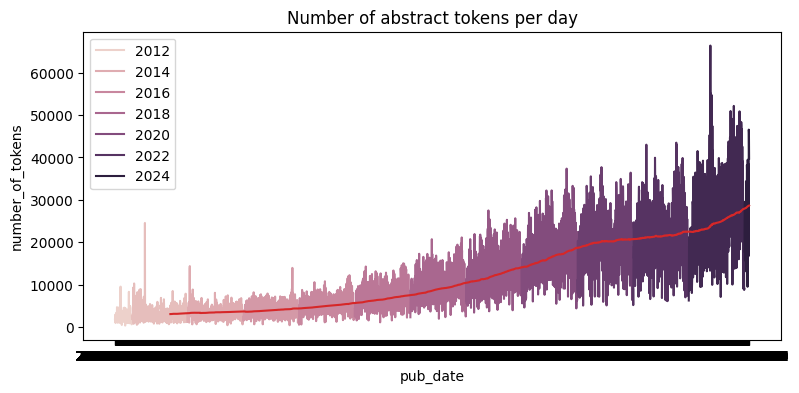

In [16]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of abstract tokens per day');

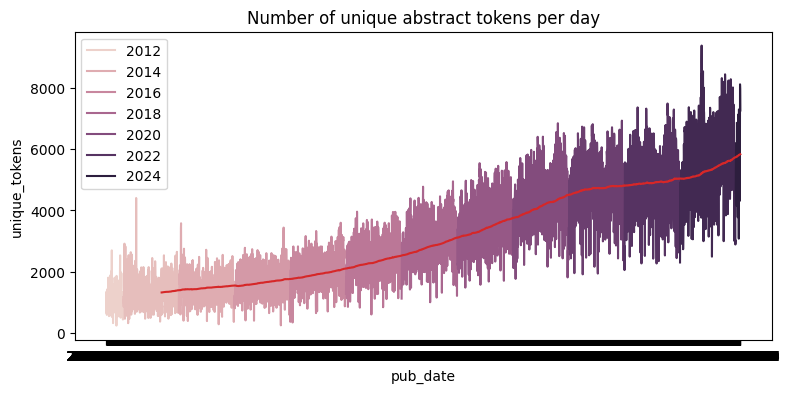

In [17]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of unique abstract tokens per day');

Text(0.5, 1.0, 'Lexical diversity per day')

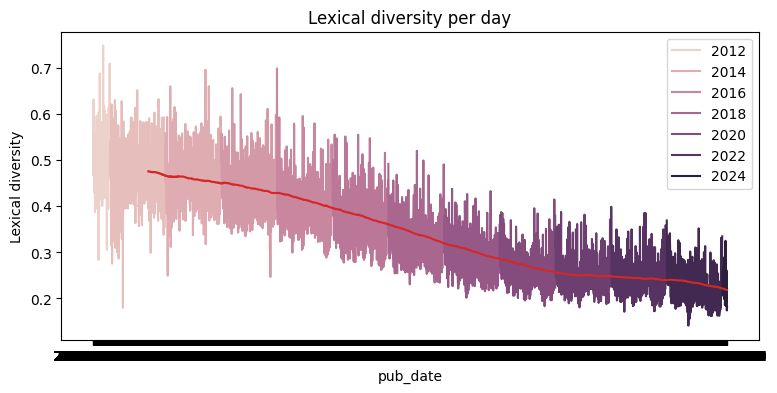

In [26]:
# Plot the line graph representing lexical diversity over time
plt.figure(figsize=(9, 4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], 
             x=date_df['pub_date'], 
             hue=pd.to_datetime(date_df['pub_date']).dt.year)

# Plot a rolling mean of lexical diversity for smoothing
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), 
             x=date_df['pub_date'])

# Set ylabel and title for the plot
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day')

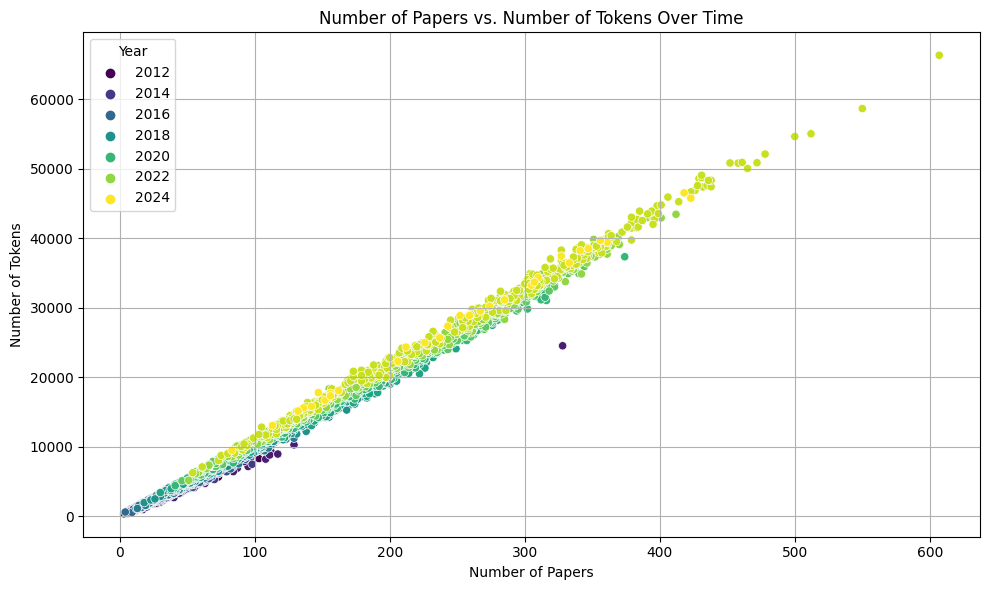

In [25]:
# Create the scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=date_df['number_of_papers'], 
                y=date_df['number_of_tokens'], 
                hue=pd.to_datetime(date_df['pub_date']).dt.year,
                palette='viridis')  

# Set plot title and labels
plt.title('Number of Papers vs. Number of Tokens Over Time')
plt.xlabel('Number of Papers')
plt.ylabel('Number of Tokens')
plt.legend(title='Year', loc='upper left')
plt.grid(True)  
plt.tight_layout()
plt.show()

<Axes: ylabel='pub_date'>

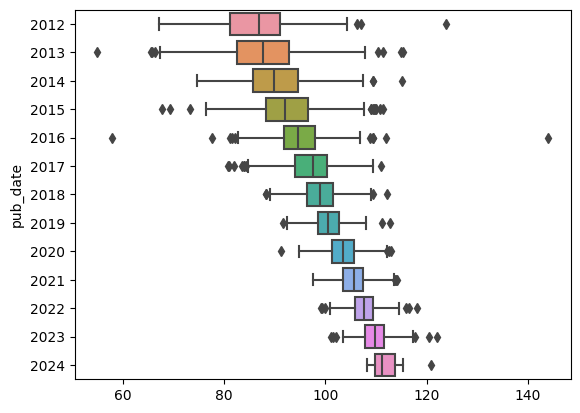

In [20]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'))


StopIteration: 

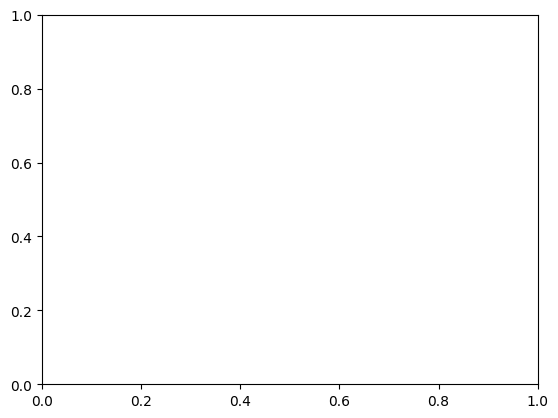

In [21]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

### Creating Word Vectors

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
start_time = time.time()
#### turn the text strings into token vectors
#### but only if a token appears in at least 500 documents 
count_text_vectorizer = CountVectorizer(min_df=500, ngram_range=(1,2))
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

print(f"Shape: {count_text_vectors.shape}\n")
count_text_vectorizer.get_feature_names_out()

In [ ]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

In [ ]:
date_df

In [ ]:
#plt.figure(figsize=(9,4))
#token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
#             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
#for i in token_list:
#    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), alpha=0.7)
##plt.title('Use of the word "neural"')
##plt.axhline(3, ls='--')
##plt.legend(token_list)

In [ ]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(50)]

In [ ]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

print(f"Number of total tokens: {len(top_tokens_list)}")

In [ ]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']
date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:1000].index

In [ ]:
plt.figure(figsize=(12,9))
token_list = date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:3000].index

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers'] / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3,)
    except:
        pass

In [ ]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']


df_dict = {}
for col in date_df.drop(columns=drop_list).columns:
    df_dict[col] = (date_df[col] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean() / date_df[col].max()

moving_avg_df = pd.concat([date_df['pub_date'], pd.DataFrame(df_dict)], axis=1)[538:].reset_index(drop=True)
moving_avg_df = moving_avg_df.rename(columns={'pub_date': 'ds'})

In [ ]:
moving_avg_df

In [ ]:
#date_df.to_csv('lemmatized_date_df.csv', index=False)
#moving_avg_df.to_csv('lemmatized_moving_avg_df.csv', index=False)

In [ ]:
#https://stackoverflow.com/questions/45143450/how-to-fit-polynomial-to-a-time-series-data-in-python
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in moving_avg_df.drop(columns=['ds']).columns[:500]:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), alpha=0.3)

In [ ]:
plt.figure(figsize=(8,4))
x = [i for i in range(len(moving_avg_df))]

for word in ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             ]:
    y = moving_avg_df[word]
    curve = np.polyfit(x,y, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    plt.plot(x,y,p(x))

In [ ]:
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]
polynomial_dict = {}

for word in moving_avg_df.drop(columns=['ds']).columns:
    y = moving_avg_df[word]*1000
    polynomial_dict[word] = np.polyfit(x,y, deg=7)

In [ ]:
polynomial_df = pd.DataFrame(polynomial_dict).T.reset_index().rename(columns = {'index':'token', 0:'deg7', 1:'deg6', 2:'deg5', 3:'deg4',
                                                 4:'deg3', 5:'deg2', 6:'deg1', 7:'y_int'})

In [ ]:
sns.histplot(polynomial_df['y_int'])

In [ ]:
polynomial_df

In [ ]:
len(polynomial_df['positive_slope'])

### KNeighbors Clustering based on polynomial curves

In [ ]:
polynomial_df['positive_slope'] = polynomial_df['deg1'] > 0

In [ ]:
sns.pairplot(polynomial_df, hue='positive_slope')

### KMeans Clustering

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MaxAbsScaler, PowerTransformer, Normalizer

In [ ]:
X = polynomial_df.drop(columns=['token', 'positive_slope'])

sc = QuantileTransformer()
X_sc = sc.fit_transform(X)
pd.DataFrame(X_sc, columns = X.columns)

In [ ]:
1 / np.log(np.abs(X)) * np.sign(X)

In [ ]:
sns.pairplot(pd.concat([pd.DataFrame(X_sc, columns = X.columns), polynomial_df['positive_slope']], axis=1), hue='positive_slope')

In [ ]:
k_clusters = KMeans(n_clusters=7,)

k_clusters.fit(X_sc)

In [ ]:
k_clusters.labels_

In [ ]:
polynomial_df['cluster'] = k_clusters.labels_

In [ ]:
polynomial_df

In [ ]:
#plt.figure(figsize=(32,32))
sns.pairplot(polynomial_df.drop(columns=['token']), hue='cluster')
#plt.savefig("clustered_pairplot2.png")

In [ ]:
cluster_dict = {}
for i in range(len(neighbors_df)):
    cluster_dict[neighbors_df['unique_id'][i]] = neighbors_df['cluster'][i]

In [ ]:
#temp_df = polynomial_df[polynomial_df['cluster']==0][['deg7','deg6','deg5','deg4','deg3','deg2','deg1','y_int']].reset_index(drop=True)
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in polynomial_df[polynomial_df['cluster']==6]['token']:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=2)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), linewidth=0.1, color='black')


In [ ]:
integral_dict = {}

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[7000:]:
#    integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
limited_df = moving_avg_df[:-392]

In [ ]:
%%time
#limited_integral_dict = {}
for token in moving_avg_df.drop(columns=['ds']).columns[8000:]:
    limited_integral_dict[token] = [sum(np.abs(limited_df[token] - limited_df[word])) for word in limited_df.drop(columns=['ds']).columns]


In [ ]:
pd.DataFrame(limited_integral_dict).to_csv('limited_integral_df.csv', index=False)

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[0:10]:
#    limited_integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
#pd.DataFrame(integral_dict).to_csv('integral_dict.csv', index=False)

In [ ]:
#integral_df = pd.DataFrame(integral_dict)
limited_integral_df = pd.read_csv('limited_integral_df.csv')
integral_df = pd.read_csv('integral_dict.csv')
moving_avg_df = pd.read_csv('lemmatized_moving_avg_df.csv')

limited_integral_df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = limited_integral_df

k_cluster_model = KMeans(n_clusters=50)
k_cluster_model.fit(X)

limited_integral_df['original_tokens'] = limited_integral_df.columns
limited_integral_df['k_cluster'] = k_cluster_model.labels_

In [ ]:
cluster_num = 35
#print([i for i in integral_df[integral_df['k_cluster']==cluster_num]['original_tokens']])
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].plot.line(legend=False, linewidth=0.3)#, ylim=(0,.003))
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].mean(axis=1).plot.line(color='blue', linestyle='-')#ylim=(0,.003))
plt.show()
print([i for i in limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']])

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0,50):
    moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==i]['original_tokens']].mean(axis=1).plot.line()

In [ ]:
#!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

In [ ]:
%%time
visualization = KElbowVisualizer(estimator=k_cluster_model,k=(2,20))

visualization.fit(X)

In [ ]:
visualization.show()

In [ ]:
intercluster_vis = InterclusterDistance(KMeans(25))
intercluster_vis.fit(X)

In [ ]:
silhouette_vis = SilhouetteVisualizer(KMeans(20))

silhouette_vis.fit(X)

In [ ]:
#integral_df.to_csv('integral_cluster_all_data.csv')
limited_integral_df.to_csv('integral_cluster_limited_data.csv')

In [ ]:
limited_integral_df['original_tokens'] =  limited_integral_df['original_tokens'].str.replace(' ','.')
limited_integral_df[['original_tokens','k_cluster']].to_csv('limited_integral_cluster_labels.csv', index=False)

In [ ]:
limited_integral_df['original_tokens']